# HOMEWORK 5
## Zankhana Mehta
## 002320268
## mehta.zan@northeastern.edu

### __QUESTION 1__

In [15]:
import torch
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# reshaping the data
# X = np.reshape(X, (60000, 28*28))
# X_test = np.reshape(test_data_array, (10000, 28*28))

In [4]:
# Set random seed for reproducibility
seed = 1234
# cuDNN uses nondeterministic algorithms, set some options for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.manual_seed(seed)

In [8]:
# Initial transform (convert to PyTorch Tensor only)
transform = transforms.Compose([
    transforms.ToTensor(),
])
#torchvision.datasets.MNIST(root=root_dir,download=True) first download the MNIST data and set the root directory accordingly
root_dir = './data'
train_data = datasets.MNIST(root_dir, train=True, download=True, transform=transform)
test_data = datasets.MNIST(root_dir, train=False, download=True, transform=transform)

X = train_data.data.numpy()
Y = train_data.targets.numpy()

test_data_array = test_data.data.numpy()
test_set_labels = test_data.targets.numpy()

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████| 9.91M/9.91M [00:02<00:00, 3.39MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 1.04MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 917kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 3.22MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [12]:
print(f"Shape of Training Data (Images): {X.shape}")
print(f"Shape of Training Data (Labels): {Y.shape}")
print(f"Shape of Test Data (Images): {test_data_array.shape}")
print(f"Shape of Test Data (Labels): {test_set_labels.shape}")

Shape of Training Data (Images): (60000, 28, 28)
Shape of Training Data (Labels): (60000,)
Shape of Test Data (Images): (10000, 28, 28)
Shape of Test Data (Labels): (10000,)


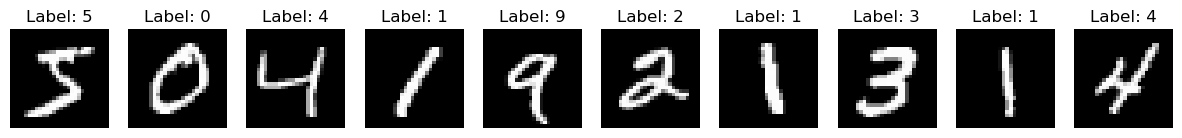

In [16]:
def display_sample_images(data, labels, n=10):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(data[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# Display sample images
display_sample_images(X, Y)

In [18]:
# reshaping the data
X = np.reshape(X, (60000, 28 * 28))
X_test = np.reshape(test_data_array, (10000, 28 * 28))

# Check the new shapes
print(f"Reshaped Training Data Shape: {X.shape}")  # Expected: (60000, 784)
print(f"Reshaped Test Data Shape: {X_test.shape}")

Reshaped Training Data Shape: (60000, 784)
Reshaped Test Data Shape: (10000, 784)


In [20]:
# Train-Validation split

rand = np.arange(60000)
np.random.shuffle(rand)
train_no = rand[:50000]

val_no = np.setdiff1d(rand,train_no)

X_train, X_val = X[train_no, :], X[val_no, :]
Y_train, Y_val = Y[train_no], Y[val_no]

In [22]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"Y_val shape: {Y_val.shape}")

X_train shape: (50000, 784)
Y_train shape: (50000,)
X_val shape: (10000, 784)
Y_val shape: (10000,)


### Part a

In [28]:
# PCA
from sklearn.decomposition import PCA

# Apply PCA to the training dataset
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)

# Apply the same transformation to validation and test sets
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Print the top 20 eigenvalues
print("Top 20 Eigenvalues:")
print(pca.singular_values_)

# Print the explained variance ratios
print("\nExplained Variance Ratios (Top 20 Components):")
print(pca.explained_variance_ratio_)

# Print the cumulative explained variance to see how much total variance is captured
print("\nCumulative Explained Variance:")
print(np.cumsum(pca.explained_variance_ratio_))

Top 20 Eigenvalues:
[129303.76281634 110306.41542987 102780.60257534  95822.04114557
  91183.71634406  85981.74649481  75079.7557979   70368.34576806
  68979.38949861  63656.69806283  60205.74178602  58877.38691992
  54160.07687215  53902.26736237  52044.89229056  50459.35977535
  47627.45219215  46746.61892185  45095.84757553  44430.02798978]

Explained Variance Ratios (Top 20 Components):
[0.09750292 0.07095726 0.06160524 0.05354589 0.04848751 0.04311296
 0.03287313 0.02887686 0.02774815 0.02363108 0.02113835 0.02021587
 0.01710621 0.01694374 0.01579616 0.01484837 0.01322848 0.01274371
 0.01185956 0.01151194]

Cumulative Explained Variance:
[0.09750292 0.16846019 0.23006543 0.28361132 0.33209883 0.37521179
 0.40808491 0.43696178 0.46470993 0.488341   0.50947936 0.52969522
 0.54680144 0.56374518 0.57954134 0.59438971 0.60761819 0.6203619
 0.63222145 0.64373339]


### Part b

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model with a higher max_iter to avoid convergence warnings
log_reg = LogisticRegression(max_iter=2000, random_state=seed)

# Train the Logistic Regression model on the training data
log_reg.fit(X_train_pca, Y_train)

# Predict on the training data
train_preds = log_reg.predict(X_train_pca)
train_accuracy = accuracy_score(Y_train, train_preds)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Predict on the validation data
val_preds = log_reg.predict(X_val_pca)
val_accuracy = accuracy_score(Y_val, val_preds)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Predict on the test data
test_preds = log_reg.predict(X_test_pca)
test_accuracy = accuracy_score(test_set_labels, test_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8749
Validation Accuracy: 0.8781
Test Accuracy: 0.8809


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Part c

In [36]:
# select number of components

num_components = np.arange(20, 201, 20)

# Write your implementation below
# Initialize variables to store results
best_num_components = 0
best_val_accuracy = 0

# List to store results for plotting or analysis
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Loop through different numbers of components
for num in num_components:
    # Apply PCA with the current number of components
    pca = PCA(n_components=num)
    
    # Fit PCA on the training data and transform the data
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    X_test_pca = pca.transform(test_data_array.reshape(test_data_array.shape[0], -1))
    
    # Train Logistic Regression model
    log_reg = LogisticRegression(max_iter=2000, random_state=seed)
    log_reg.fit(X_train_pca, Y_train)
    
    # Calculate training accuracy
    train_preds = log_reg.predict(X_train_pca)
    train_accuracy = accuracy_score(Y_train, train_preds)
    
    # Calculate validation accuracy
    val_preds = log_reg.predict(X_val_pca)
    val_accuracy = accuracy_score(Y_val, val_preds)
    
    # Calculate test accuracy
    test_preds = log_reg.predict(X_test_pca)
    test_accuracy = accuracy_score(test_set_labels, test_preds)
    
    # Store the accuracies
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
    
    # Update best validation accuracy and number of components if applicable
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_num_components = num

# Print the results
print(f"Best number of components: {best_num_components}")
print(f"Best validation accuracy: {best_val_accuracy:.4f}")

# Evaluate with the best number of components
pca = PCA(n_components=best_num_components)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(test_data_array.reshape(test_data_array.shape[0], -1))

log_reg = LogisticRegression(max_iter=2000, random_state=seed)
log_reg.fit(X_train_pca, Y_train)

# Training, Validation, and Test accuracy using the best number of components
train_preds = log_reg.predict(X_train_pca)
train_accuracy = accuracy_score(Y_train, train_preds)

val_preds = log_reg.predict(X_val_pca)
val_accuracy = accuracy_score(Y_val, val_preds)

test_preds = log_reg.predict(X_test_pca)
test_accuracy = accuracy_score(test_set_labels, test_preds)

print(f"Training Accuracy with {best_num_components} components: {train_accuracy:.4f}")
print(f"Validation Accuracy with {best_num_components} components: {val_accuracy:.4f}")
print(f"Test Accuracy with {best_num_components} components: {test_accuracy:.4f}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Best number of components: 180
Best validation accuracy: 0.9253
Training Accuracy with 180 components: 0.9288
Validation Accuracy with 180 components: 0.9263
Test Accuracy with 180 components: 0.9263


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Comment: Using only 20 components led to a test accuracy of 88.09%, while using 180 components resulted in a test accuracy of 92.63%.
This ~4.5% increase highlights the importance of selecting an appropriate number of components to capture sufficient variance without losing critical information.. By using 180 components, the model retains a significantly larger portion of the dataset's variance, leading to improved classification performance. This suggests that most of the important information lies in a higher-dimensional space.. Selecting 180 principal components significantly improves the model's performance, demonstrating that this dimensionality retains sufficient information to achieve high accuracy while reducing computational complexity. The model effectively balances bias and variance, achieving robust performance across training, validation, and test datasets

### __QUESTION 2__

### Part a

While prediction and classification aim to accurately forecast future outcomes based on observed data, causal inference goes beyond simply predicting by seeking to understand the "why" behind an observed relationship, essentially identifying whether one variable directly causes a change in another; in simpler terms, prediction is about "what will happen" while causal inference is about "what would happen if we changed something."

Key differences:

1. Focus on cause-and-effect:

Causal inference aims to establish a true causal relationship between variables, while prediction only seeks to identify correlations and patterns that can be used to make accurate forecasts. 

2. Intervention analysis:

Causal inference often involves hypothetical scenarios where a specific intervention is applied to understand its potential impact, whereas prediction typically focuses on predicting future outcomes based on current data. 

3. Confounding variables:

Causal inference actively addresses the issue of confounding variables (factors that could influence both the "cause" and the "effect"), while prediction models may not necessarily account for these complexities

Real-life scenario:

Prediction:

Imagine a retail company wanting to predict which customers are most likely to purchase a new product based on their past buying behavior and demographics. This model would identify patterns in data to classify customers as "likely to buy" or "unlikely to buy," without necessarily understanding why certain customer characteristics lead to higher purchase rates. 

Causal Inference:

If the company wants to understand the causal effect of a targeted marketing campaign on purchase behavior, they would need to use causal inference methods. This would involve comparing the purchase rates of customers who received the campaign to those who did not, while controlling for other factors like demographics or prior purchase history, to determine if the campaign truly caused an increase in sales

In summary:

Causal Inference seeks to understand why something happens.
Prediction focuses on forecasting future events or outcomes without needing to explain why.
Classification groups instances into categories based on input data.

### Part b

The potential outcomes framework, also known as the Rubin Causal Model is a statistical method used in causal inference to understand the effect of a treatment by comparing the potential outcomes of individuals if they were exposed to the treatment versus if they were not, essentially allowing researchers to estimate a "what-if" scenario by creating hypothetical situations where individuals are assigned to either a treatment group (receiving the intervention) or a control group (receiving no intervention or a standard treatment) and then comparing their outcomes; the key concept is that each individual has two potential outcomes, one for each treatment condition, even though only one of them can be observed in reality.

Key components:

Treatment Group:In a study using the potential outcomes framework, the treatment group consists of individuals who are assigned to receive the intervention or treatment being studied. By comparing the outcomes of this group to the control group, researchers can assess the causal effect of the treatment.

Control Group:The control group in this framework comprises individuals who are not exposed to the treatment being studied. They serve as a comparison point to evaluate the effect of the treatment by providing an estimate of what the outcome would have been for the treatment group if they had not received the treatment. 

How it works:

Potential Outcomes:For each individual, there are two potential outcomes: the outcome they would experience if they were assigned to the treatment group (Y_t) and the outcome they would experience if assigned to the control group (Y_c). 

Observed Outcome:In reality, only one of these potential outcomes can be observed for each individual, depending on which group they are assigned to.

Causal Effect:The causal effect of the treatment for an individual is calculated as the difference between their potential outcome under treatment (Y_t) and their potential outcome under control (Y_c)

### Part c

The Difference-in-Means (DiM) estimator is a simple statistical method used to estimate the Average Treatment Effect (ATE) in experiments or observational studies where a population is divided into two groups: a treatment group and a control group.

It measures the difference between the average outcomes of the treatment group and the control group, assuming that the only systematic difference between the two groups is the treatment.

Let:
Y- 1 be the average outcome of the treatment group.

Y-0 be the average outcome of the control group.

The Difference-in-Means estimator is given by:

τ^= Y-1− Y-0
where 𝜏^ is the estimate of the Average Treatment Effect (ATE).

Relation to the Average Treatment Effect (ATE)
The Average Treatment Effect (ATE) is defined as the difference between the expected outcomes for the treated (Y1) and untreated (Y0) populations:
opulations:
ATE=𝐸[𝑌1−𝑌0]

The Difference-in-Means Estimator 
τ^ is an estimate of the ATE:

τ^≈ATE

### Part d

Selection bias occurs when the treatment and control groups in an experiment or observational study are not comparable due to systematic differences in their characteristics. This leads to biased estimates of the treatment effect because the observed difference in outcomes may reflect pre-existing differences between the groups rather than the causal effect of the treatment. In other words, selection bias arises when:Certain types of individuals are more (or less) likely to be assigned to the treatment or control group.
The observed outcomes are influenced by factors other than the treatment, confounding the estimation of causal effects.

To eliminate selection bias, researchers use randomized assignment when conducting experiments. In a randomized controlled trial (RCT):

1. Randomization: Individuals (or units) are randomly assigned to either the treatment group or the control group.

This ensures that the two groups are statistically equivalent in terms of observed and unobserved characteristics.
Randomization breaks the link between the treatment assignment and confounding variables, making it possible to attribute differences in outcomes to the treatment itself.

2. Balance Between Groups: Due to randomization, any pre-treatment differences between the groups occur purely by chance and tend to diminish as the sample size increases.

Selection Bias in Randomized Experiments
In randomized experiments:

Selection bias is eliminated (or minimized) because the treatment assignment is independent of the individuals' characteristics.
The expected difference in pre-treatment characteristics between the treatment and control groups is zero.
Mathematically:

Let Y1 be the potential outcome under treatment, and Y0 be the potential outcome under control.
In randomized experiments:
𝐸[𝑌1∣Treatment]=𝐸[𝑌1]

𝐸[𝑌0∣Control]=𝐸[𝑌0]

This implies that:
E[τ^]=E[Y1−Y0]=ATE

Therefore, the selection bias is zero, meaning the estimate of the treatment effect is unbiased.